In [32]:
import sys
print(sys.version)
%matplotlib inline
%run -i ~/Python/pjr3
# Function to convert longitude from 0-360 to -180 to 180
def fix_lon(lon):
        return np.where(lon > 180, lon - 360, lon)
    

def list_nans(aa):
    """Return a list of vertices containing nans, and not containing nans
    Usage:
    lt, lf = list_nans(np.array)
    
    lt = list of vertices containing NaNs
    lf = list of vertices that dont have NaNs
    
    """
    l0 = np.isnan(aa)
    l1 = np.where(l0 == True)
    l2 = np.where(l0 == False)
    print('NaNs at index',l1[0])
    return l1[0], l2[0]
    


3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]
pjr3.py complete


<Figure size 432x288 with 0 Axes>

In [4]:
# identify a model case directory, and a directory to store remapped climo files
import os
host = os.environ.get('HOST')
print(host)
if ('cori' in host):
    indir = '/global/cscratch1/sd/pjr/b.e11.B1850C5CN.f19_g16.008/*.nc'
else:
    indir = '~/NetCDF_Files/vd05_ANN_climo.nc'
#os.path.exists(indir)
#DS = xr.open_mfdataset(indir).chunk({'time': 20})
DS = xr.open_mfdataset(indir)
print(DS)
weights = DS.tarea
weights = weights.fillna(0) # get rid of NaNs
weights.name = 'weights'
#print(weights)
#print(weights.sum(),4.*pi)
#Var = DS.FSNT.isel(time=0)
Var = DS.aice.isel(time=0)
print(Var.shape)
#Varwt = Var.weighted(weights)
#print(Varwt)
#Varmean = Varwt.mean('ncol')
#print(Varmean)
Varm2 = Var.weighted(weights).mean(('ni','nj'))
print(Varm2)
print('shape',Varm2.shape)
print('area weighted mean', Varm2.values)

cori16
<xarray.Dataset>
Dimensions:      (d2: 2, ni: 320, nj: 104, nvertices: 4, time: 16800)
Coordinates:
  * time         (time) object 0001-02-01 00:00:00 ... 1401-01-01 00:00:00
    TLON         (nj, ni) float32 dask.array<chunksize=(104, 320), meta=np.ndarray>
    TLAT         (nj, ni) float32 dask.array<chunksize=(104, 320), meta=np.ndarray>
    ULON         (nj, ni) float32 dask.array<chunksize=(104, 320), meta=np.ndarray>
    ULAT         (nj, ni) float32 dask.array<chunksize=(104, 320), meta=np.ndarray>
Dimensions without coordinates: d2, ni, nj, nvertices
Data variables:
    time_bounds  (time, d2) object dask.array<chunksize=(16800, 2), meta=np.ndarray>
    tmask        (nj, ni) float32 dask.array<chunksize=(104, 320), meta=np.ndarray>
    tarea        (nj, ni) float32 dask.array<chunksize=(104, 320), meta=np.ndarray>
    uarea        (nj, ni) float32 dask.array<chunksize=(104, 320), meta=np.ndarray>
    dxt          (nj, ni) float32 dask.array<chunksize=(104, 320), meta=np.

In [284]:
print(Varm2.values)

22.029602


vertices shape (104, 320, 4)
data shape (104, 320)
grid shape (104, 320)
NaNs at index [  0   0   0 ... 103 103 103]
tnan, fnan [  0   0   0 ... 103 103 103] [  0   0   0 ... 103 103 103]
tlon tnan, fnan shapes (9536,) (23744,)
104
all grid pts 33280
lonv shape2 (33280, 4)
data shape2 (33280,)
NaNs at index [   27    28    29 ... 33277 33278 33279]
tnan, fnan [   27    28    29 ... 33277 33278 33279] [    0     1     2 ... 32911 32912 32913]
data tnan, fnan shapes (15592,) (17688,)
33280
 #grid pts after removing data NaNs 17688 17688
NaNs at index []
tnan, fnan [] [    0     1     2 ... 17685 17686 17687]
tlon tnan, fnan shapes (0,) (17688,)
 #grid pts after removing coordinate NaNs 17688 17688
first point 0.0 [320.      321.11612 321.1156  320.     ] [30.150635 30.15198  30.604626 30.603233]
subset shape (17688,)
good data pts 17688
lonv shape2 (17688, 4)
data shape2 (17688,)
comb shape (17688, 4, 2)


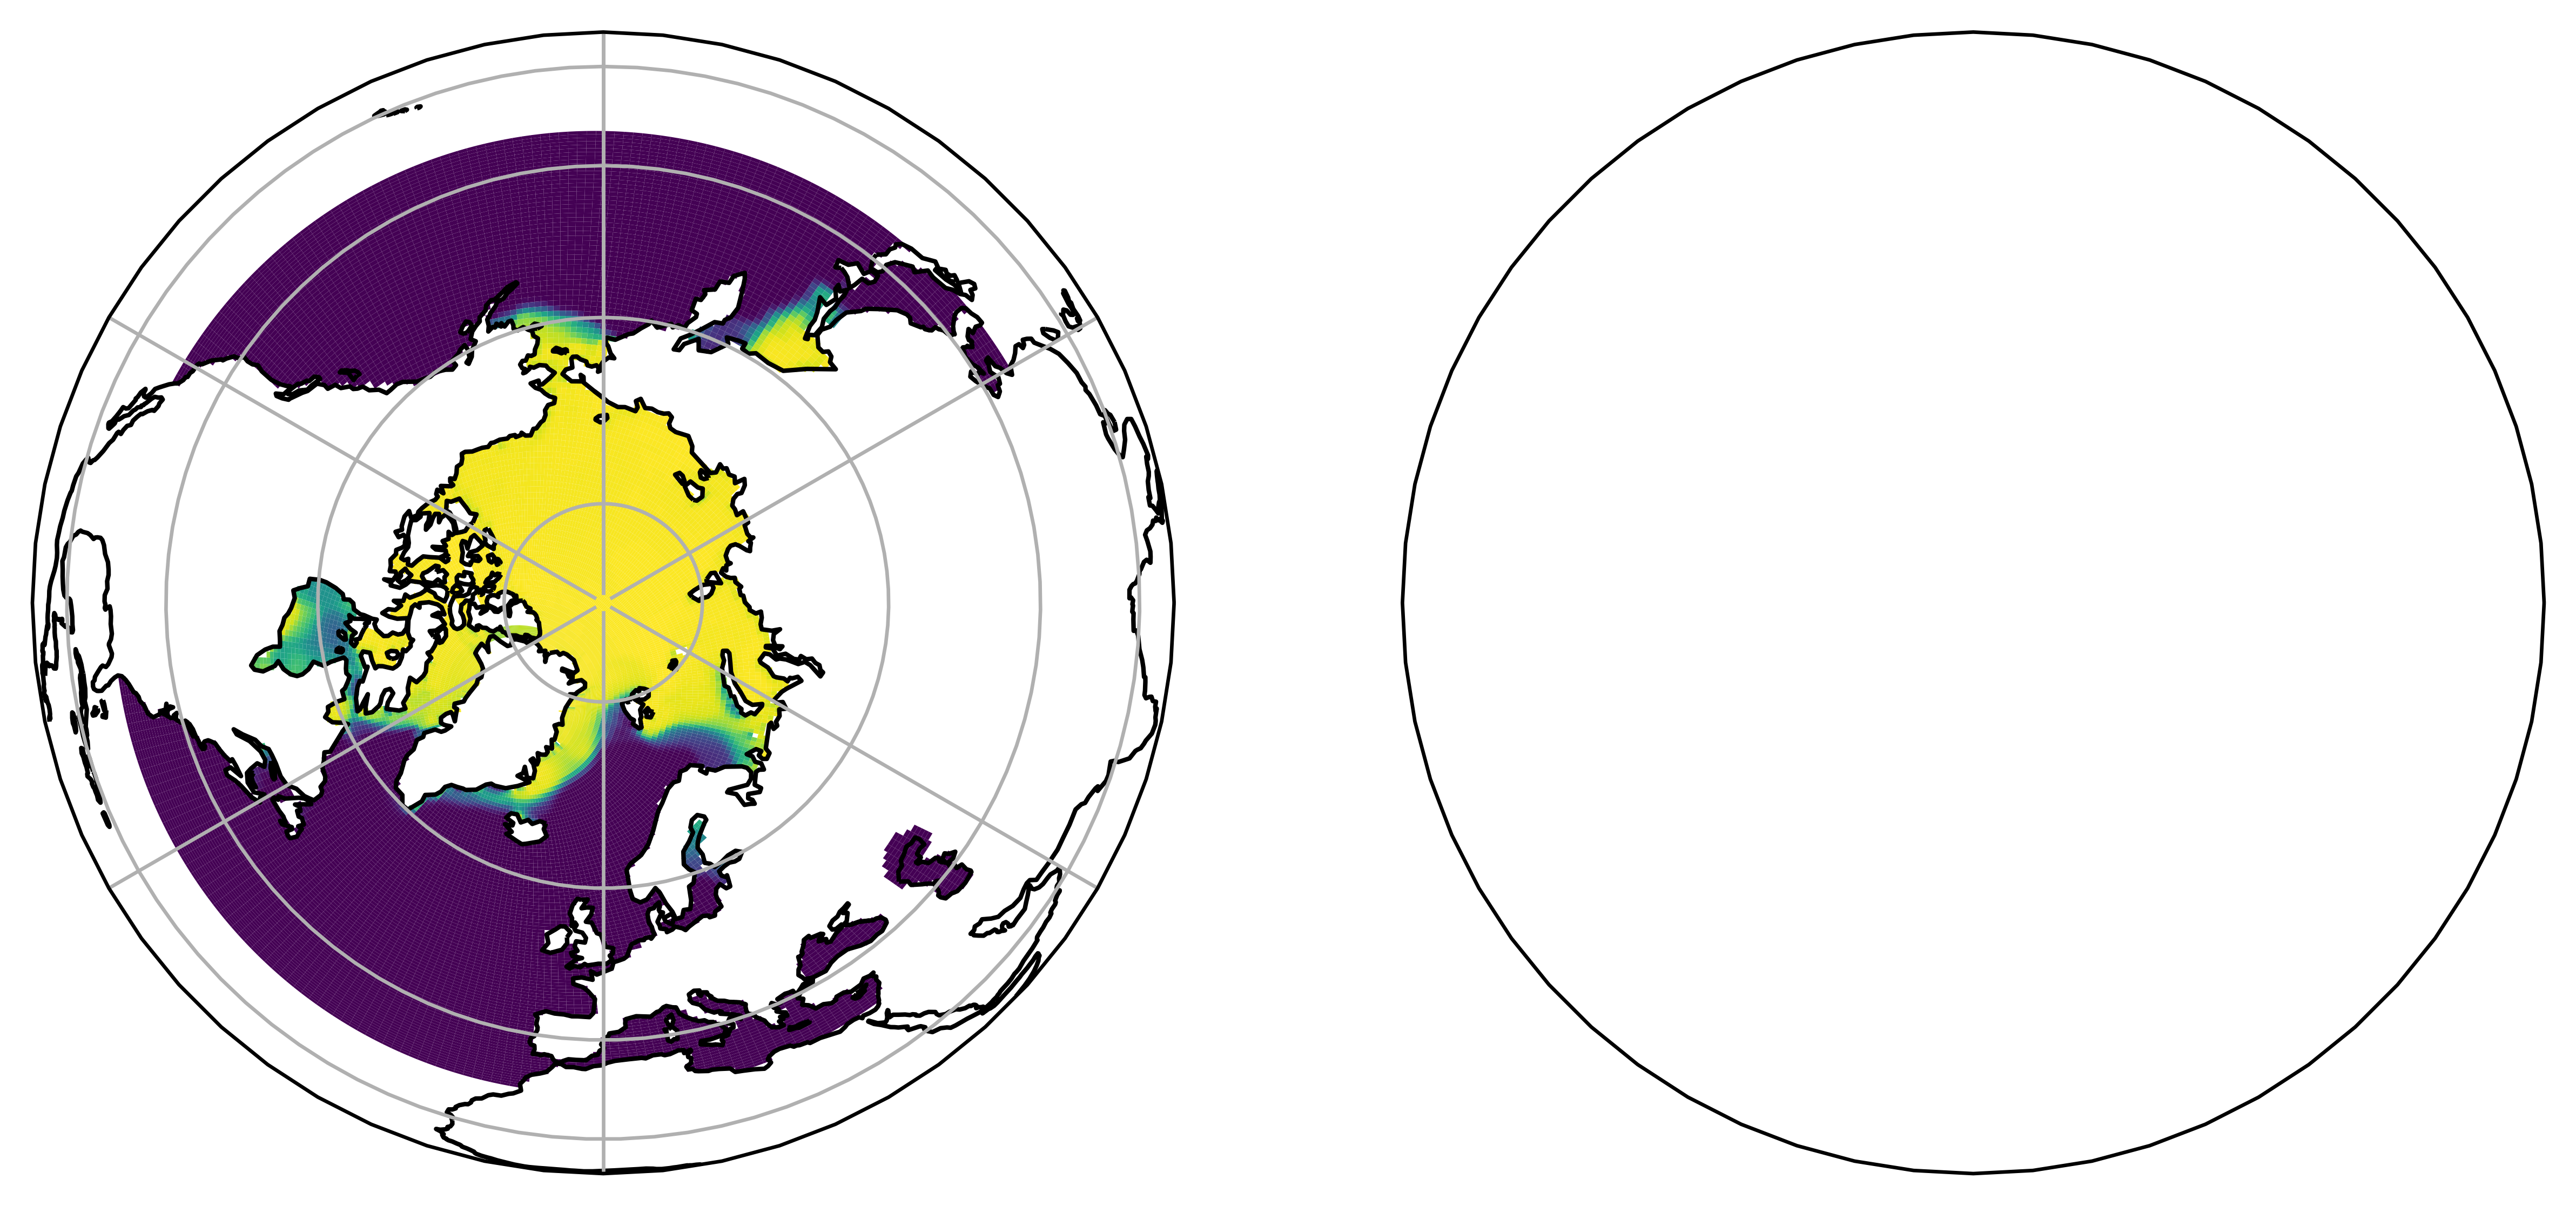

In [373]:
# plot using polar orthographic projection

# grab vertices, cell centers and data from dataset as numpy arrays
lonv = np.array(DS.lont_bounds)
latv = np.array(DS.latt_bounds)
print('vertices shape', latv.shape)
data = np.array(Var)
print('data shape', data.shape)
tlon = np.array(DS.TLON)
tlat = np.array(DS.TLAT)
print('grid shape', tlat.shape)

# identify ocean/ice cells and cells that are not used by ocean/ice
tnan, fnan = list_nans(tlon)
print('tnan, fnan', tnan, fnan)
print('tlon tnan, fnan shapes', tnan.shape, fnan.shape)
print(len(tlon))

# number of grid cells
npts = data.size
print('all grid pts', npts)

# reshape all 
lonv = lonv.reshape((npts,4))
latv = latv.reshape((npts,4))
print('lonv shape2', lonv.shape)
data = data.reshape((npts))
tlon = tlon.reshape((npts))
tlat = tlat.reshape((npts))
print('data shape2', data.shape)

# identify good cells and others based on data array
tnan, fnan = list_nans(data)
print('tnan, fnan', tnan, fnan)
print('data tnan, fnan shapes', tnan.shape, fnan.shape)
print(len(data))

# get rid of all cells not containing good data 
data = data[fnan]
lonv = lonv[fnan,:]
latv = latv[fnan,:]
tlon = tlon[fnan]
tlat = tlat[fnan]

npts = data.size
print(' #grid pts after removing data NaNs', npts, len(data))

# make sure that all the element flagged as not useful by TLON are also removed.
# the TLON and TLAT arrays also contain NaNs
tnan, fnan = list_nans(tlon)
print('tnan, fnan', tnan, fnan)
print('tlon tnan, fnan shapes', tnan.shape, fnan.shape)

# get rid of all cells containing nan data
data = data[fnan]
lonv = lonv[fnan,:]
latv = latv[fnan,:]
tlon = tlon[fnan]
tlat = tlat[fnan]

npts = data.size
print(' #grid pts after removing coordinate NaNs', npts, len(tlon))

print('first point',data[0],lonv[0],latv[0])

# subset for debugging
'''
l0 = np.where(np.logical_and(tlat>=0, tlat<=91))[0]
print('subset', len(l0))
data = data[l0]
lonv = lonv[l0,:]
latv = latv[l0,:]
tlon = tlon[l0]
tlat = tlat[l0]

l0 = np.where(np.logical_and (tlon>0, tlon<180))[0]
data = data[l0]
lonv = lonv[l0,:]
latv = latv[l0,:]
tlon = tlon[l0]
tlat = tlat[l0]
#1./0.
'''


# define a few cells along a particular longitude to be able to look at
lonlook = 0.
ll1 = np.where(abs(lonv[:]-lonlook) < 5) # find cells near longitude lonlook
#print('llook', len(ll1))
#print('ll1 first points',ll1[0])
#1./0.

# summarize the shape of the grid, vertice and data arrays
npts = data.size
print('subset shape',tlon.shape)
print('good data pts', npts)
print('lonv shape2', lonv.shape)
print('data shape2', data.shape)

# make a plot
fig = plt.figure(figsize=[10, 5])

# ax1 for Northern Hemisphere
ax1 = fig.add_subplot(1, 2, 1, projection=ccrs.Orthographic(0, 90))

# ax2 for Southern Hemisphere
ax2 = fig.add_subplot(1, 2, 2, projection=ccrs.Orthographic(180, -90))

ax = ax1
#for ax in [ax1, ax2]:


# fix the vertice array when it crosses greenwich
# the polygon fills dont work well if some are list as near 360 degrees and others are listed near 1 degree
# this is done very inefficiently, and it could be sped up a lot, but this way allows easier debugging
for ind in range(0,lonv.shape[0]):
    lonc = lonv[ind,]
    latc = latv[ind,]
    if (lonv[ind,].max()-lonv[ind,].min()) > 300:
        #print('ind', ind, lonc, latc)
        lonc = np.where(lonc[:] <= 30,lonc+360,lonc)
        lonv[ind,] = lonc

ax.coastlines()
        
# create an array of lat lon vertices to give to polycollection  
comb = np.stack([lonv,latv], axis=2)
print('comb shape',comb.shape)

# Create a PatchCollection from our aggregated list of PathPatches

#p = PolyCollection(comb, array=data, edgecolor='none',transform=ccrs.PlateCarree()) # doesn't work near poles
p = PolyCollection(comb, array=data, edgecolor='none',transform=ccrs.Geodetic()) # connect vertices via great circles
ax.add_collection(p)

# code to mark cell centers
#ax.plot(
#    fix_lon(tlon.values),
#    tlat.values,
#    marker='o', markersize=0.5,
#    MarkerFaceColor='black', MarkerEdgeColor='black',
#   linestyle='none',
#)

#ax.coastlines(zorder=3)
#ax.stock_img()
ax.gridlines()


# adding a polycollection doesn't expand the bounding box for some reason, so plot a zero width line near the equator
eqlon = np.arange(0,360,1.)
#print(eqlon)
eqlat = np.ones(len(eqlon))*10.
ax.plot(eqlon, eqlat, color='red', linewidth=0, transform=ccrs.PlateCarree())# Orthographic(0,90)) #Geodetic()) ##

plt.savefig('test.pdf',bbox_inches='tight')
plt.show()

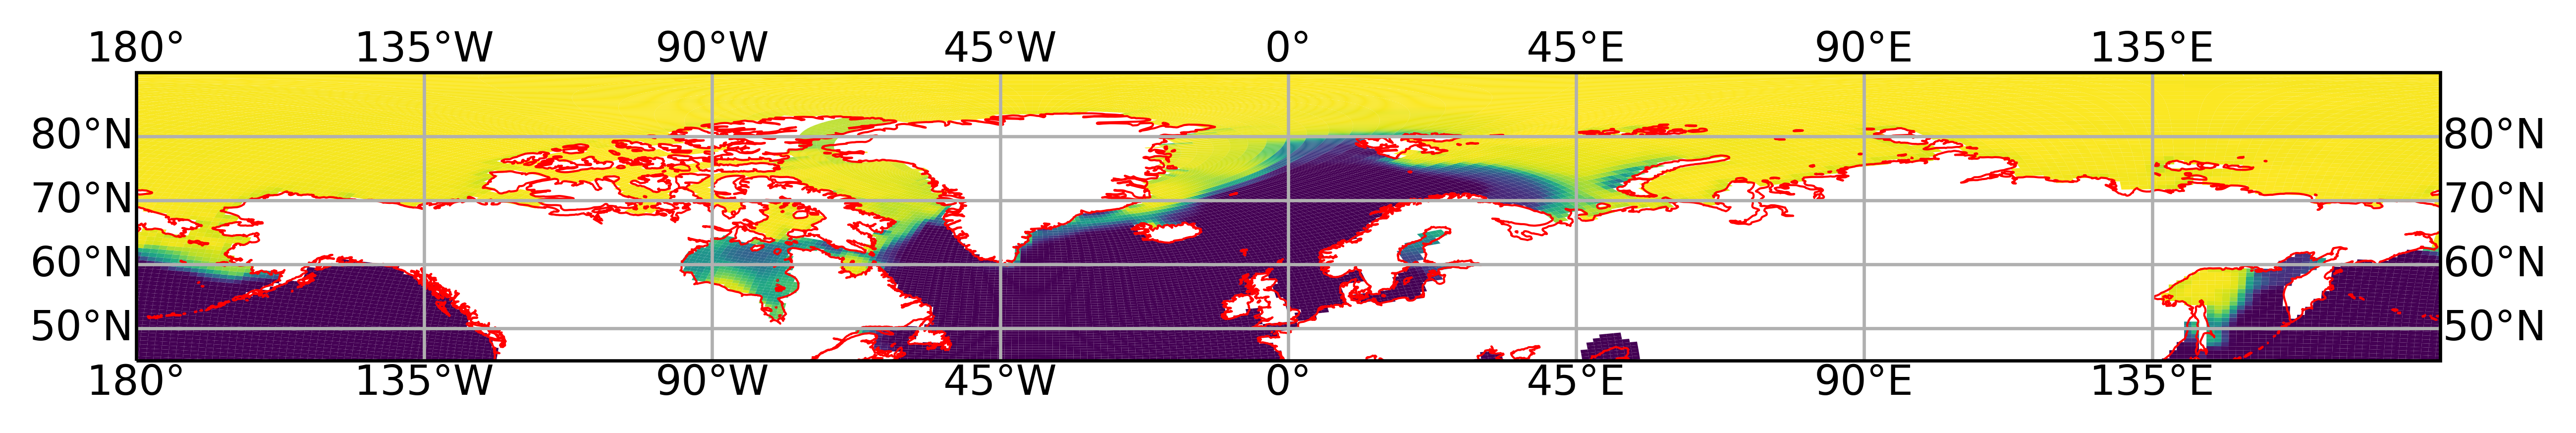

In [376]:

fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 600
#ax.coastlines() 
#ax.plot(
#    fix_lon(tlon.values),
#    tlat.values,
#    marker='o', markersize=0.5,
#    MarkerFaceColor='black', MarkerEdgeColor='black',
#   linestyle='none',
#)

p = PolyCollection(comb, array=data, edgecolor='none',transform=ccrs.Geodetic()) # connect vertices via great circles
ax.add_collection(p)

# Set sane axes limits
#ax.set_xlim([lonv.min(), lonv.max()])
#ax.set_ylim([latv.min(), latv.max()])

# Set sane axes limits
#ax.set_xlim([0., 360.])
#ax.set_ylim([0.,90.])
ax.set_extent([-180, 180, 45, 90], crs=ccrs.PlateCarree())

#ax.set_global()
ax.coastlines(color='red', linewidth=0.5)
ax.gridlines(xlocs=np.arange(-180,180,45), draw_labels=True, crs=ccrs.PlateCarree())

#da.plot()
#plt.savefig('test.pdf',bbox_inches='tight')
plt.show()